In [2]:
import pandas as pd
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import r2_score,make_scorer

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

import matplotlib as mpl
mpl.rcParams.update(
    {
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    }
)

In [4]:
np_CHI = np.load('./np_regression/np_CHI.npy')
np_IG = np.load('./np_regression/np_IG.npy')
np_MI = np.load('./np_regression/np_MI.npy')

In [14]:
# 标准化训练集的数据
def standard_data(train_data):
    print('data_size:{}'.format(train_data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(train_data[:,0:2])
    np2 = train_data[:,2:17]
    np3 = scaler.fit_transform(train_data[:,17:67])
#     np4 = data[:,67:68]
    np_scale_data = np.hstack((np1,np2,np3))
    print('data_scale_size:{}'.format(np_scale_data.shape))
    return np_scale_data


# 把数据切分成训练集和测试集 输入没有标准化的数据
def split_data(data):
    X = data[:,0:-1]
    y = data[:,-1]
    return train_test_split(X,y,test_size=0.2)

def train_elasticnet(train_x,train_y,alpha):
    train_scale_x = standard_data(train_x)
    param_range = np.linspace(0.1,0.9,20)
    train_scores,valid_scores = validation_curve(ElasticNet(alpha=alpha),
                                                 train_scale_x,train_y,
                                                 param_name='l1_ratio',
                                                 param_range=param_range,
                                                 scoring=make_scorer(mean_squared_error,greater_is_better=True),
                                                 cv=5)
    train_score_ans = [item.mean() for item in train_scores]
    valid_score_ans = [item.mean() for item in valid_scores]
    return param_range,train_score_ans,valid_score_ans

In [3]:
np.linspace(0.1,0.9,15)

array([0.1       , 0.15714286, 0.21428571, 0.27142857, 0.32857143,
       0.38571429, 0.44285714, 0.5       , 0.55714286, 0.61428571,
       0.67142857, 0.72857143, 0.78571429, 0.84285714, 0.9       ])

data_size:(2596, 67)
data_scale_size:(2596, 67)


D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8240008622192363, tolerance: 0.5563249899561333
  positive)
D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2824573323373443, tolerance: 0.6094773158267801
  positive)
D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6674624414881691, tolerance: 0.5812273469213075
  positive)


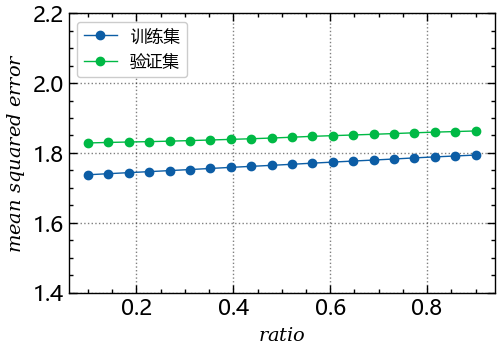

In [34]:
train_x,test_x,train_y,test_y = split_data(np_MI)
param_range,train_score,valid_score = train_elasticnet(train_x,train_y,0.01)
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(5.5,3.7),dpi=100)
#     plt.xscale('log')
    plt.ylim([1.4,2.2])
    plt.plot(param_range,train_score,linewidth=1,marker='o',label='训练集')
    plt.plot(param_range,valid_score,linewidth=1,marker='o',label='验证集')
    plt.xlabel(r'$ratio$',fontdict={'size':14})
    plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()

In [28]:
param_range,train_score,valid_score = train_elasticnet(train_x,train_y,0.008)

data_size:(2903, 67)
data_scale_size:(2903, 67)


In [38]:
def split_data(data):
    X = data[:,0:-1]
    y = data[:,-1]
    return train_test_split(X,y,test_size=0.2)

# 输入不包含因变量的训练数据和测试数据
def standard_data(train_data,test_data):
    print('train_data_size:{}'.format(train_data.shape))
    print('test_data_size:{}'.format(test_data.shape))
    scaler = StandardScaler()
    
    scaler1 = scaler.fit(train_data[:,0:2])
    np1_train = scaler1.transform(train_data[:,0:2])
    np1_test = scaler1.transform(test_data[:,0:2])
    
    np2_train = train_data[:,2:17]
    np2_test = test_data[:,2:17]
    
    scaler2 = scaler.fit(train_data[:,17:67])
    np3_train = scaler2.transform(train_data[:,17:67])
    np3_test = scaler2.transform(test_data[:,17:67])

    np_train_data = np.hstack((np1_train,np2_train,np3_train))
    np_test_data = np.hstack((np1_test,np2_test,np3_test))
    print('train_data_scale_size:{}'.format(np_train_data.shape))
    print('test_data_scale_size:{}'.format(np_test_data.shape))
    return np_train_data,np_test_data


# 传入标准化的数据
def get_model_score(train_x,train_y,test_x,test_y,model):
    ans = {}
    rgs = model.fit(train_x,train_y)
    ans['MSE'] = mean_squared_error(test_y,rgs.predict(test_x))
    ans['MAE'] = mean_absolute_error(test_y,rgs.predict(test_x))
    ans['R2'] = r2_score(test_y,rgs.predict(test_x))
    return ans

models = [
    [
        ElasticNet(alpha=0.01,l1_ratio=0.5),
    ],
    [
        ElasticNet(alpha=0.01,l1_ratio=0.5),
    ],
    [
        ElasticNet(alpha=0.01,l1_ratio=0.5),
    ]
]
code_feature = {
    0:'CHI',
    1:'IG',
    2:'MI'
}
code_model = {
    0:'El',
}
score = {}
for idx,data in enumerate([np_CHI,np_IG,np_MI]):
    train_x,test_x,train_y,test_y = split_data(data)
    train_x,test_x = standard_data(train_x,test_x)
    score[code_feature[idx]] = {}
    for model_id,model in enumerate(models[idx]):
        score[code_feature[idx]][code_model[model_id]] = get_model_score(train_x,train_y,test_x,test_y,model)

train_data_size:(2903, 67)
test_data_size:(726, 67)
train_data_scale_size:(2903, 67)
test_data_scale_size:(726, 67)
train_data_size:(2903, 67)
test_data_size:(726, 67)
train_data_scale_size:(2903, 67)
test_data_scale_size:(726, 67)
train_data_size:(2596, 67)
test_data_size:(649, 67)
train_data_scale_size:(2596, 67)
test_data_scale_size:(649, 67)


In [40]:
print(score)

{'CHI': {'El': {'MSE': 1.7585856382776008, 'MAE': 0.9424751269481471, 'R2': 0.37368134659596586}}, 'IG': {'El': {'MSE': 1.8217243798442955, 'MAE': 0.937617841460565, 'R2': 0.40178494167992673}}, 'MI': {'El': {'MSE': 1.6700649624227062, 'MAE': 0.9585601175157152, 'R2': 0.37704952941517966}}}


In [41]:
draw_data = {
    'CHI-ElasticNet':[0.8761,1.3999,0.4441],
    'IG-ElasticNet':[0.9357,1.8492,0.3762],
    'MI-ElasticNet':[0.9745,1.7838,0.3922]
}

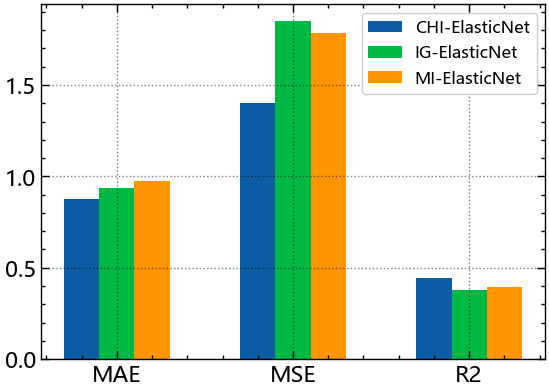

In [58]:
xNames = ['MAE','MSE','R2']
x = np.arange(3)

with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4.7),dpi=100)
    plt.bar(x-0.2,[0.8761,1.3999,0.4441],width=0.2,label='CHI-ElasticNet')
    plt.bar(x,[0.9357,1.8492,0.3762],width=0.2,label='IG-ElasticNet')
    plt.bar(x+0.2,[0.9745,1.7838,0.3922],width=0.2,label='MI-ElasticNet')
#     plt.xlabel(r'$ratio$',fontdict={'size':14})
#     plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.xticks(x, xNames)#rotation控制倾斜角度
    plt.legend(loc='upper right',prop={'size':12})
    plt.show()

In [49]:
np.arange(2)

array([0, 1])

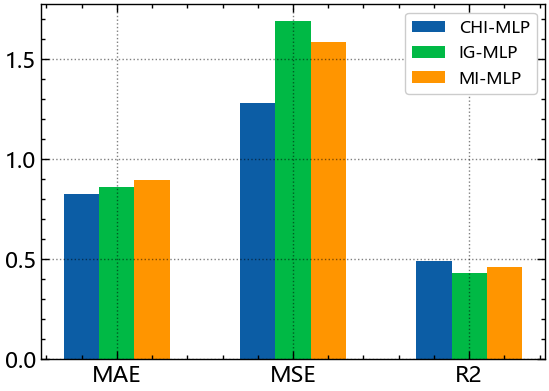

In [59]:
xNames = ['MAE','MSE','R2']
x = np.arange(3)

with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4.7),dpi=100)
    plt.bar(x-0.2,[0.8267,1.2813,0.4912],width=0.2,label='CHI-MLP')
    plt.bar(x,[0.8607,1.6882,0.4305],width=0.2,label='IG-MLP')
    plt.bar(x+0.2,[0.8972,1.5828,0.4607],width=0.2,label='MI-MLP')
#     plt.xlabel(r'$ratio$',fontdict={'size':14})
#     plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.xticks(x, xNames)#rotation控制倾斜角度
    plt.legend(loc='upper right',prop={'size':12})
    plt.show()

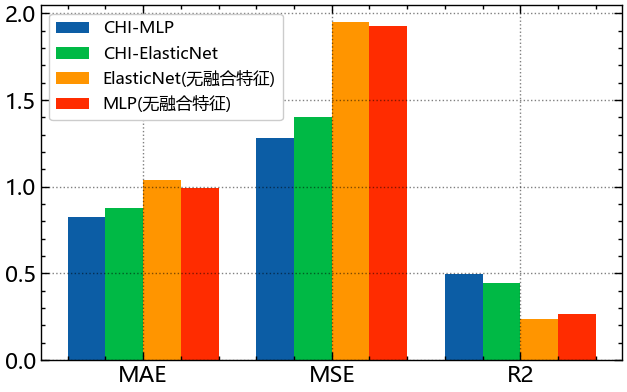

In [13]:
xNames = ['MAE','MSE','R2']
x = np.arange(3)

with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(7.5,4.7),dpi=100)
    plt.bar(x-0.4,[0.8267,1.2813,0.4992],width=0.2,label='CHI-MLP',align='edge')
    plt.bar(x-0.2,[0.8761,1.3999,0.4441],width=0.2,label='CHI-ElasticNet',align='edge')
    plt.bar(x,[1.0383,1.9492,0.2391],width=0.2,label='ElasticNet(无融合特征)',align='edge')
    plt.bar(x+0.2,[0.9903,1.9296,0.2640],width=0.2,label='MLP(无融合特征)',align='edge')
#     plt.xlabel(r'$ratio$',fontdict={'size':14})
#     plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.xticks(x, xNames)#rotation控制倾斜角度
    plt.legend(loc='upper left',prop={'size':12})
    plt.show()